In [1]:
from sklearn.preprocessing import MinMaxScaler
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tensorflow.keras import models,layers,optimizers,callbacks
from sklearn.model_selection import train_test_split

In [2]:
df = pd.read_csv('NOC.csv',usecols=['Open','High','Low','Close','Date'])
df.Date = pd.to_datetime(df.Date, format="%Y-%m-%d")
df.set_index('Date',inplace=True)
print(df.info())
df.head()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2769 entries, 2010-01-04 to 2020-12-31
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Open    2769 non-null   float64
 1   High    2769 non-null   float64
 2   Low     2769 non-null   float64
 3   Close   2769 non-null   float64
dtypes: float64(4)
memory usage: 108.2 KB
None


,Open,High,Low,Close
Date,,,,
2010-01-04,50.686352,51.382046,50.686352,51.363976
2010-01-05,51.228451,51.906075,51.228451,51.454327
2010-01-06,51.318802,51.698269,51.129066,51.653095
2010-01-07,51.427219,52.366859,51.246521,52.186161
2010-01-08,51.833794,52.493351,51.635025,51.897041


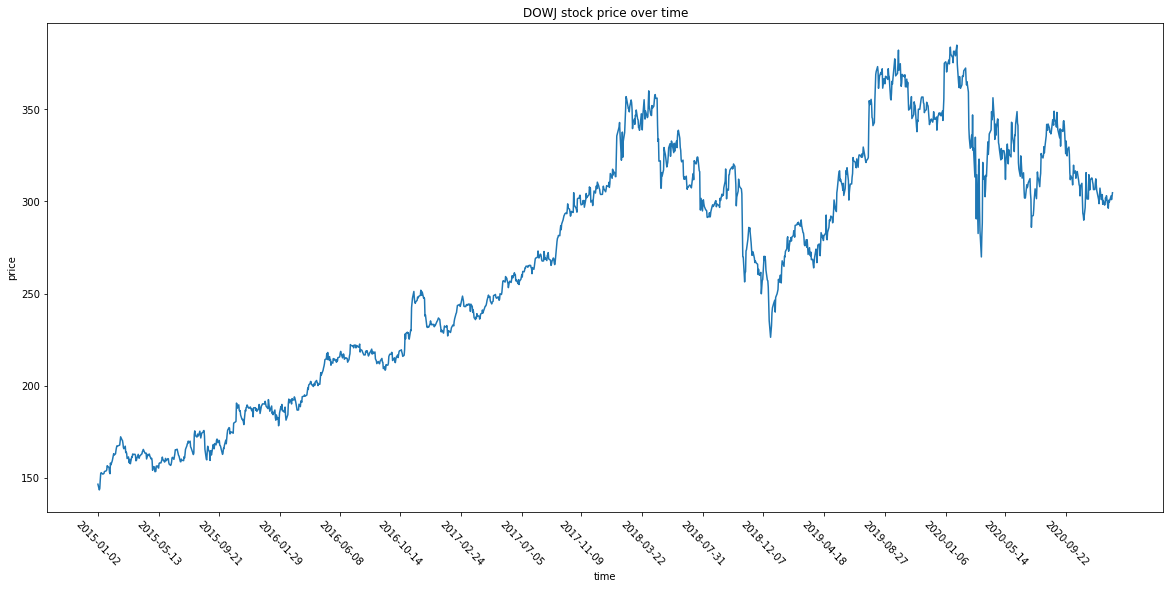

In [3]:
plt.figure(figsize=(20,9))
df = df['2015':'2020']
plt.plot(df.index, df["Close"])
plt.xticks(df[::90].index, df[::90].index.date,rotation = -46)
plt.title("DOWJ stock price over time")
plt.xlabel("time")
plt.ylabel("price")
plt.show()

In [4]:
# split a univariate sequence into samples
def split_sequence(sequence, n_steps):
	X, y = list(), list()
	for i in range(len(sequence)):
		# find the end of this pattern
		end_ix = i + n_steps
		# check if we are beyond the sequence
		if end_ix > len(sequence)-1:
			break
		# gather input and output parts of the pattern
		seq_x, seq_y = sequence[i:end_ix], sequence[end_ix]
		X.append(seq_x)
		y.append(seq_y)
	return np.array(X), np.array(y)

In [10]:
train_data, test_data = train_test_split(df,random_state=42,test_size=0.2,shuffle=False) 
window_size = 40
X_train, y_train = split_sequence(train_data["Close"].values, window_size)
X_test, y_test = split_sequence(test_data["Close"].values, window_size)

# MLP Model

In [11]:
network = models.Sequential([
  layers.Dense(100, activation='relu', input_dim=window_size),  
  layers.Dense(1)
])
# network.compile(optimizer=optimizers.Adam(learning_rate=0.001),loss='binary_crossentropy',metrics=['accuracy']) #loss='mse
network.compile(optimizer=optimizers.Adam(learning_rate=0.001),loss='mse',metrics=['accuracy']) 
network.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_2 (Dense)              (None, 100)               4100      
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 101       
Total params: 4,201
Trainable params: 4,201
Non-trainable params: 0
_________________________________________________________________


In [12]:
cb = callbacks.TensorBoard()
trained_network=network.fit(X_train, y_train, epochs=200, batch_size=64,verbose=1,callbacks=[cb],validation_split=0.16,shuffle=False)

 4ms/step - loss: 219.4055 - accuracy: 0.0000e+00 - val_loss: 412.0874 - val_accuracy: 0.0000e+00
Epoch 72/200
16/16 [==============================] - 0s 4ms/step - loss: 217.3293 - accuracy: 0.0000e+00 - val_loss: 413.7158 - val_accuracy: 0.0000e+00
Epoch 73/200
16/16 [==============================] - 0s 4ms/step - loss: 215.1724 - accuracy: 0.0000e+00 - val_loss: 415.4420 - val_accuracy: 0.0000e+00
Epoch 74/200
16/16 [==============================] - 0s 4ms/step - loss: 212.8819 - accuracy: 0.0000e+00 - val_loss: 417.6368 - val_accuracy: 0.0000e+00
Epoch 75/200
16/16 [==============================] - 0s 4ms/step - loss: 210.7585 - accuracy: 0.0000e+00 - val_loss: 418.9425 - val_accuracy: 0.0000e+00
Epoch 76/200
16/16 [==============================] - 0s 5ms/step - loss: 208.4012 - accuracy: 0.0000e+00 - val_loss: 421.5790 - val_accuracy: 0.0000e+00
Epoch 77/200
16/16 [==============================] - 0s 4ms/step - loss: 206.4854 - accuracy: 0.0000e+00 - val_loss: 422.2739 - val

In [13]:
y_predicted = network.predict(X_test, verbose=1)
result = test_data.iloc[window_size:]
result['Predicted'] = y_predicted
result[['Close','Predicted']]

9/9 [==============================] - 0s 1ms/step


,Close,Predicted
Date,,
2019-12-17,345.839996,342.377380
2019-12-18,338.700012,340.513367
2019-12-19,342.209991,336.888062
2019-12-20,345.910004,338.375336
2019-12-23,348.119995,336.262939
...,...,...
2020-12-24,299.600006,293.375946
2020-12-28,303.019989,292.494995
2020-12-29,300.989990,291.548920


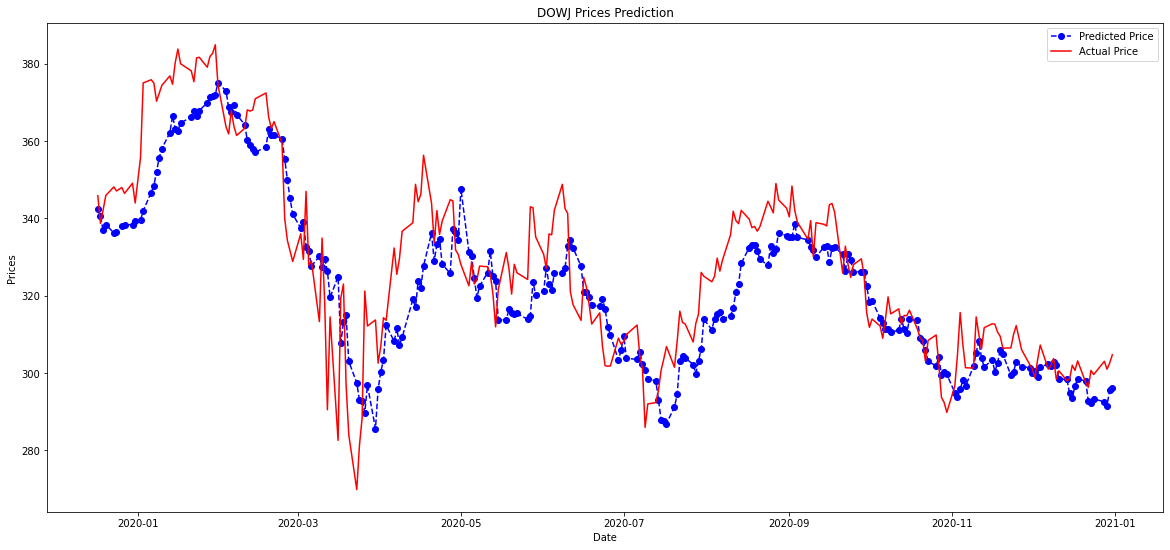

In [14]:
test_set_range = result.index
plt.figure(figsize=(20,9))
plt.plot(test_set_range, result['Predicted'], color='blue', marker='o', linestyle='dashed',label='Predicted Price')
plt.plot(test_set_range, result['Close'], color='red', label='Actual Price')
plt.title('DOWJ Prices Prediction')
plt.xlabel('Date')
plt.ylabel('Prices')
plt.legend()
plt.show()

In [8]:
d = {'a':1,'b':'text','c':[10,20],'d':{'x':100,'y':'dog'}}
print('type d = ',type(d))
print('d = ',d)
print('d keys = ',d.keys())
print('d values = ',d.values())
print("d['a'] = ",d['a'])

type d =  <class 'dict'>
d =  {'a': 1, 'b': 'text', 'c': [10, 20], 'd': {'x': 100, 'y': 'dog'}}
d keys =  dict_keys(['a', 'b', 'c', 'd'])
d values =  dict_values([1, 'text', [10, 20], {'x': 100, 'y': 'dog'}])
d['a'] =  1


In [4]:
print('d[0] = ', d[0])

KeyError: 0

In [9]:
d['b'] = 'other text'
print('d = ',d)

d =  {'a': 1, 'b': 'other text', 'c': [10, 20], 'd': {'x': 100, 'y': 'dog'}}


In [13]:
print("d['d']['x'] = ",d['d']['x'])
d['d']['x'] = 120
print("d['d']['x'] = ",d['d']['x'])

d['d']['x'] =  100
d['d']['x'] =  120
